D:\computasi intel\p\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Enter service speed (0-10):  5
Enter food quality (0-10):  5
Enter restaurant ambiance (0-10):  5


Customer happiness level: 5.000000000000001


Would you like to visualize the results? (yes/no):  yes


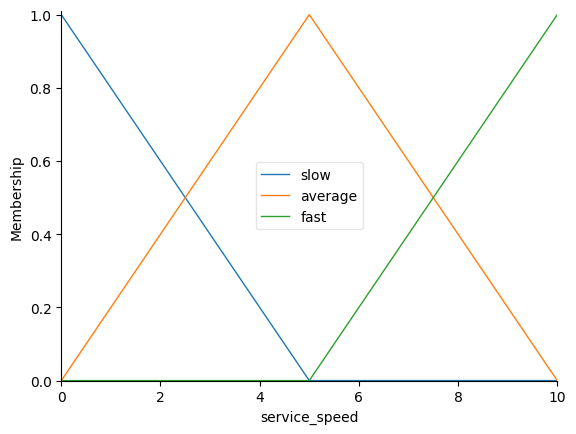

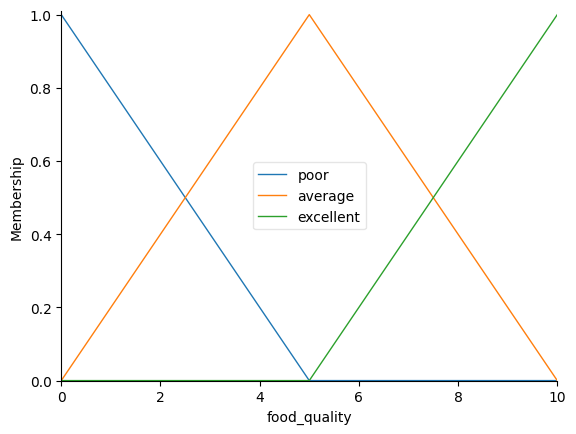

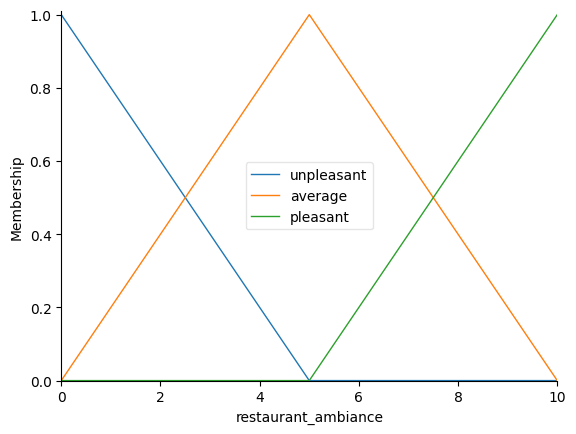

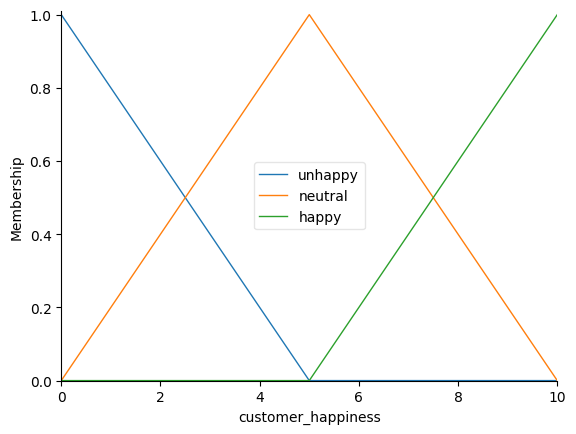

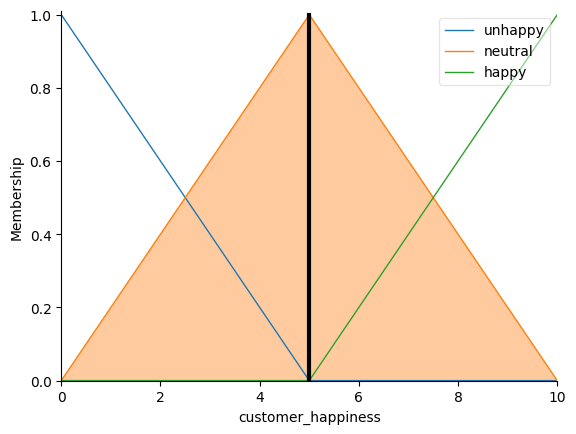

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
# Input variables
service_speed = ctrl.Antecedent(np.arange(0, 11, 1), 'service_speed')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
restaurant_ambiance = ctrl.Antecedent(np.arange(0, 11, 1), 'restaurant_ambiance')

# Output variable
customer_happiness = ctrl.Consequent(np.arange(0, 11, 1), 'customer_happiness')

# Define fuzzy membership functions
# Service speed
service_speed['slow'] = fuzz.trimf(service_speed.universe, [0, 0, 5])
service_speed['average'] = fuzz.trimf(service_speed.universe, [0, 5, 10])
service_speed['fast'] = fuzz.trimf(service_speed.universe, [5, 10, 10])

# Food quality
food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['excellent'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

# Restaurant ambiance
restaurant_ambiance['unpleasant'] = fuzz.trimf(restaurant_ambiance.universe, [0, 0, 5])
restaurant_ambiance['average'] = fuzz.trimf(restaurant_ambiance.universe, [0, 5, 10])
restaurant_ambiance['pleasant'] = fuzz.trimf(restaurant_ambiance.universe, [5, 10, 10])

# Customer happiness
customer_happiness['unhappy'] = fuzz.trimf(customer_happiness.universe, [0, 0, 5])
customer_happiness['neutral'] = fuzz.trimf(customer_happiness.universe, [0, 5, 10])
customer_happiness['happy'] = fuzz.trimf(customer_happiness.universe, [5, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(service_speed['fast'] & food_quality['excellent'] & restaurant_ambiance['pleasant'], customer_happiness['happy'])
rule2 = ctrl.Rule(service_speed['average'] & food_quality['average'] & restaurant_ambiance['average'], customer_happiness['neutral'])
rule3 = ctrl.Rule(service_speed['slow'] | food_quality['poor'] | restaurant_ambiance['unpleasant'], customer_happiness['unhappy'])

# Create control system
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
happiness_sim = ctrl.ControlSystemSimulation(happiness_ctrl)

# Visualize membership functions
service_speed.view()
food_quality.view()
restaurant_ambiance.view()
customer_happiness.view()

# Input values
happiness_sim.input['service_speed'] = float(input("Enter service speed (0-10): "))
happiness_sim.input['food_quality'] = float(input("Enter food quality (0-10): "))
happiness_sim.input['restaurant_ambiance'] = float(input("Enter restaurant ambiance (0-10): "))

# Perform simulation
happiness_sim.compute()

# Output
print(f"Customer happiness level: {happiness_sim.output['customer_happiness']}")

# Visualize output
time_to_visualize = input("Would you like to visualize the results? (yes/no): ").strip().lower()
if time_to_visualize == 'yes':
    customer_happiness.view(sim=happiness_sim)
    plt.show()
